# Title: Personalized Medical Recommendation System

# Description:

Welcome to our cutting-edge Personalized Medical Recommendation System, a powerful platform designed to assist users in understanding and managing their health. Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potential diseases accurately.

# load dataset & tools

In [2]:
import  pandas as pd

In [3]:
dataset = pd.read_csv(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\Training.csv')

In [4]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [5]:
# vals = dataset.values.flatten()

In [6]:
dataset.shape

(4920, 133)

In [7]:
len(dataset['prognosis'].unique())

41

In [8]:
dataset['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

# Exploratory Data Analysis (EDA)

In [9]:
# Overview of the dataset
print("Dataset Shape:", dataset.shape)
print("\nColumns:", dataset.columns)
print("\nData Types:\n", dataset.dtypes)
print("\nMissing Values:\n", dataset.isnull().sum())
print("\nUnique Values in Each Column:\n", dataset.nunique())

Dataset Shape: (4920, 133)

Columns: Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

Data Types:
 itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

Missing Values:
 itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
          

In [10]:
# Statistical Summary
print("Statistical Summary of Numerical Features:\n")
print(dataset.describe())

# Check for class imbalance
print("\nClass Distribution:\n")
print(dataset['prognosis'].value_counts())

Statistical Summary of Numerical Features:

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368

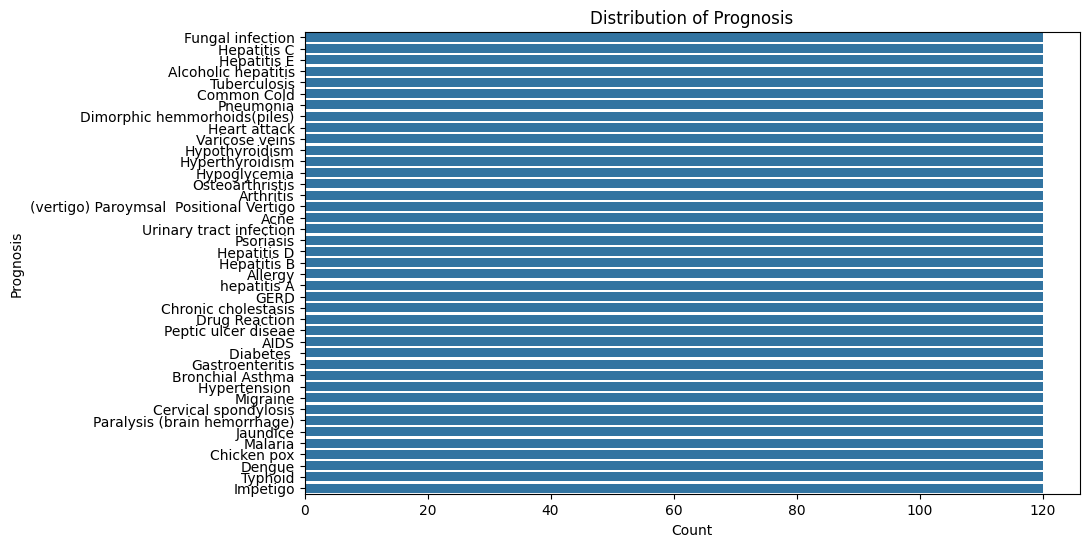

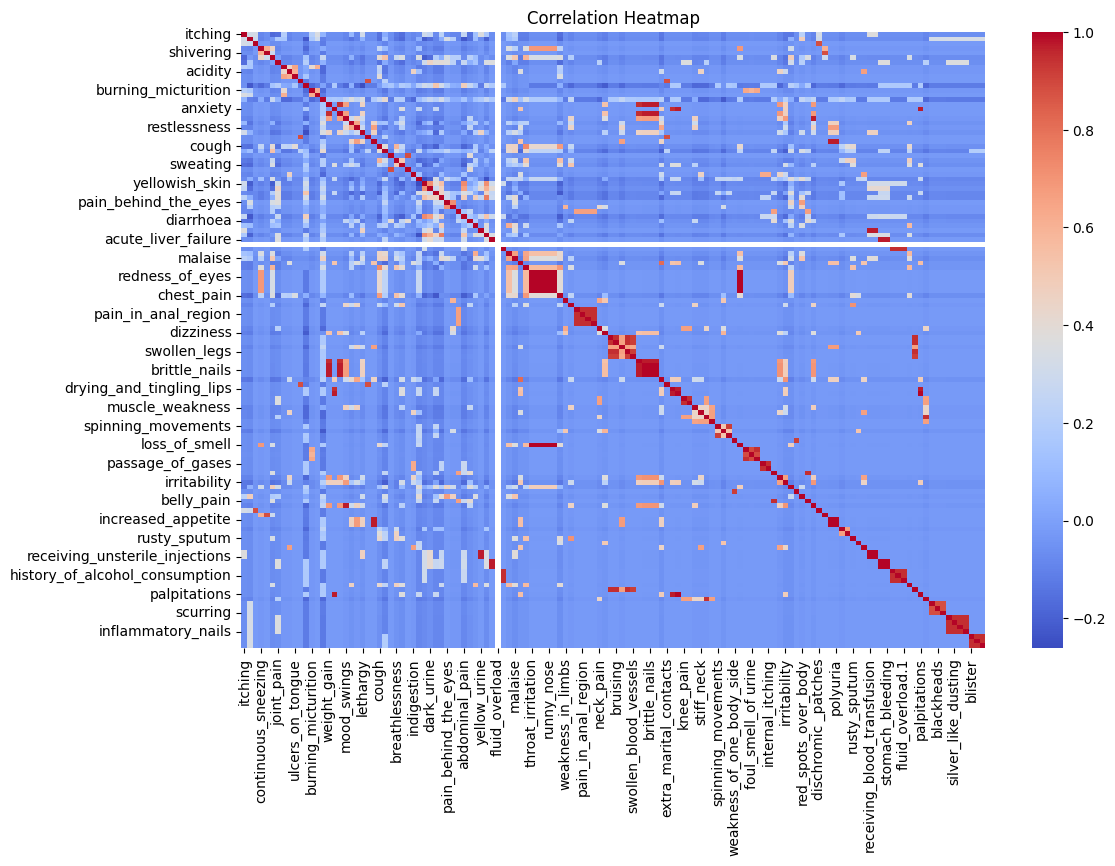

In [11]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(y=dataset['prognosis'], order=dataset['prognosis'].value_counts().index)
plt.title('Distribution of Prognosis')
plt.xlabel('Count')
plt.ylabel('Prognosis')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = dataset.drop('prognosis', axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Handling Missing Values (if any)
if dataset.isnull().sum().sum() > 0:
    print("\nHandling Missing Values...")
    dataset.fillna(method='ffill', inplace=True)
    print("Missing values filled using forward fill.")
else:
    print("\nNo missing values detected.")


No missing values detected.


C:\Users\deves\AppData\Local\Temp\ipykernel_2280\831036616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.values, y=top_5.index, palette="viridis")


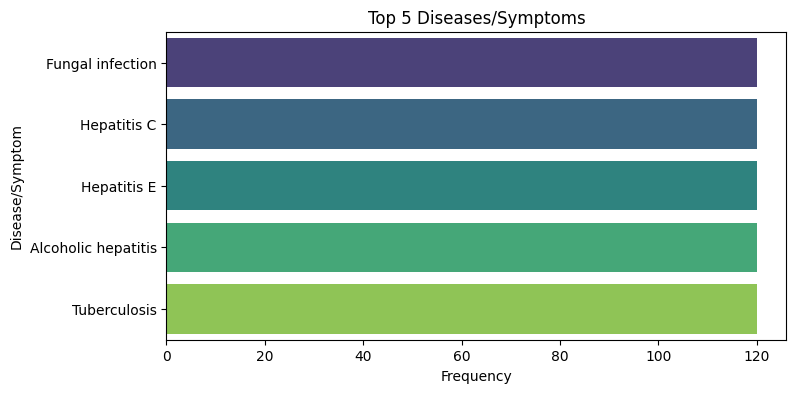

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each disease/symptom
top_5 = dataset['prognosis'].value_counts().head(5)  # Replace 'prognosis' with the actual column name if different

# Plot the top 5 diseases/symptoms
plt.figure(figsize=(8, 4))
sns.barplot(x=top_5.values, y=top_5.index, palette="viridis")
plt.title('Top 5 Diseases/Symptoms')
plt.xlabel('Frequency')
plt.ylabel('Disease/Symptom')
plt.show()

# train test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

In [16]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [17]:
# ecoding prognonsis
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

In [18]:
Y

array([15, 15, 15, ..., 38, 35, 27])

In [19]:
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [20]:
X_train.shape , y_train.shape

((3444, 132), (3444,))

In [21]:
X_test.shape , y_test.shape

((1476, 132), (1476,))

# Training top models

In [22]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")


SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]




GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


KNeighbors Accuracy: 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


MultinomialNB Accuracy: 1.0
MultinomialNB Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]




# single prediction

In [23]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [24]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [25]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [26]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


C:\Users\deves\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [27]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [39]
Actual Disease : 39


C:\Users\deves\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Recommendation System and Prediction

# load database and use logic for recommendations

In [28]:
sym_des = pd.read_csv(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\symtoms_df.csv')
precautions = pd.read_csv(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\precautions_df.csv')
workout = pd.read_csv(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\workout_df.csv')
description = pd.read_csv(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\description.csv')
medications = pd.read_csv(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\medications.csv')
diets = pd.read_csv(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\diets.csv')
# Display basic information about each dataset
datasets = {'Symptoms': sym_des, 'Precautions': precautions, 'Workout': workout, 
            'Description': description, 'Medications': medications, 'Diets': diets}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info())
    print(df.head(), "\n")

Dataset: Symptoms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4920 non-null   int64 
 1   Disease     4920 non-null   object
 2   Symptom_1   4920 non-null   object
 3   Symptom_2   4920 non-null   object
 4   Symptom_3   4920 non-null   object
 5   Symptom_4   4572 non-null   object
dtypes: int64(1), object(5)
memory usage: 230.8+ KB
None
   Unnamed: 0           Disease   Symptom_1              Symptom_2  \
0           0  Fungal infection     itching              skin_rash   
1           1  Fungal infection   skin_rash   nodal_skin_eruptions   
2           2  Fungal infection     itching   nodal_skin_eruptions   
3           3  Fungal infection     itching              skin_rash   
4           4  Fungal infection     itching              skin_rash   

               Symptom_3             Symptom_4  
0   nodal_skin_eruptions   di

C:\Users\deves\AppData\Local\Temp\ipykernel_2280\3317050193.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_symptoms.values, y=top_5_symptoms.index, palette="viridis")


Missing values in Symptoms dataset:
Unnamed: 0      0
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
dtype: int64
Top 5 Diseases/Symptoms:
Symptom
vomiting      1914
fatigue       1842
high_fever     864
chills         798
skin_rash      786
Name: count, dtype: int64


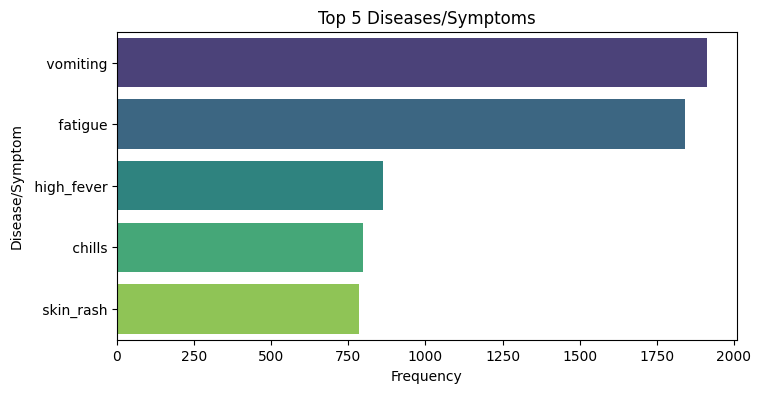

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values in Symptoms dataset:")
print(sym_des.isnull().sum())

# Analyze the frequency of symptoms/diseases
# Combine all symptom columns into a single column for analysis
symptom_columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4']
symptom_counts = sym_des[symptom_columns].melt(value_name='Symptom').dropna()['Symptom'].value_counts()
print("Top 5 Diseases/Symptoms:")
print(symptom_counts.head(5))

# Plot the top 5 diseases/symptoms
top_5_symptoms = symptom_counts.head(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_5_symptoms.values, y=top_5_symptoms.index, palette="viridis")
plt.title('Top 5 Diseases/Symptoms')
plt.xlabel('Frequency')
plt.ylabel('Disease/Symptom')
plt.show()

Missing values in Precautions dataset:
Unnamed: 0      0
Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64
Top 5 Diseases with Precautions:
Disease
Drug Reaction                   1
Urinary tract infection         1
AIDS                            1
Paralysis (brain hemorrhage)    1
Typhoid                         1
Name: count, dtype: int64


C:\Users\deves\AppData\Local\Temp\ipykernel_2280\1187284619.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_precautions.values, y=top_5_precautions.index, palette="coolwarm")


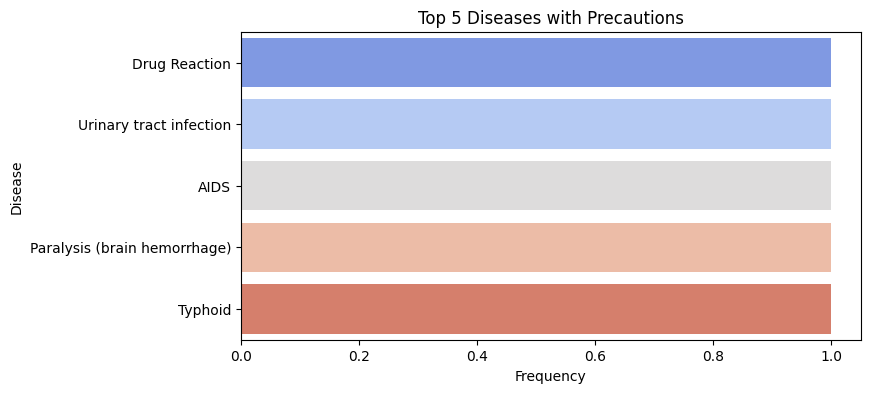

In [30]:
# Check for missing values
print("Missing values in Precautions dataset:")
print(precautions.isnull().sum())

# Analyze the frequency of diseases with precautions
precaution_counts = precautions['Disease'].value_counts()  # Use the correct column name
print("Top 5 Diseases with Precautions:")
print(precaution_counts.head(5))

# Plot the top 5 diseases with precautions
top_5_precautions = precaution_counts.head(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_5_precautions.values, y=top_5_precautions.index, palette="coolwarm")
plt.title('Top 5 Diseases with Precautions')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.show()

Missing values in Workout dataset:
Unnamed: 0.1    0
Unnamed: 0      0
disease         0
workout         0
dtype: int64
Top 5 Diseases with Workouts:
disease
Fungal infection       10
Hepatitis C            10
Hepatitis E            10
Alcoholic hepatitis    10
Tuberculosis           10
Name: count, dtype: int64


C:\Users\deves\AppData\Local\Temp\ipykernel_2280\1529635062.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_workouts.values, y=top_5_workouts.index, palette="magma")


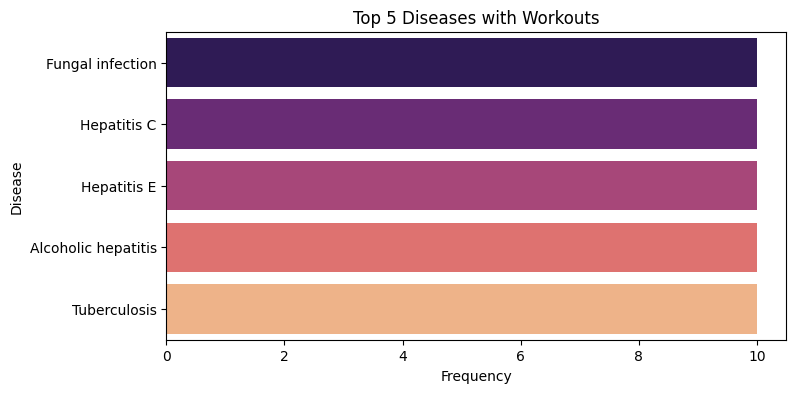

In [31]:
# Check for missing values
print("Missing values in Workout dataset:")
print(workout.isnull().sum())

# Analyze the frequency of diseases with workouts
workout_counts = workout['disease'].value_counts()  # Correct column name
print("Top 5 Diseases with Workouts:")
print(workout_counts.head(5))

# Plot the top 5 diseases with workouts
top_5_workouts = workout_counts.head(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_5_workouts.values, y=top_5_workouts.index, palette="magma")
plt.title('Top 5 Diseases with Workouts')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.show()

Missing values in Description dataset:
Disease        0
Description    0
dtype: int64
Top 5 Diseases with Descriptions:
Disease
Fungal infection       1
Hepatitis C            1
Hepatitis E            1
Alcoholic hepatitis    1
Tuberculosis           1
Name: count, dtype: int64


C:\Users\deves\AppData\Local\Temp\ipykernel_2280\2989118466.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_descriptions.values, y=top_5_descriptions.index, palette="plasma")


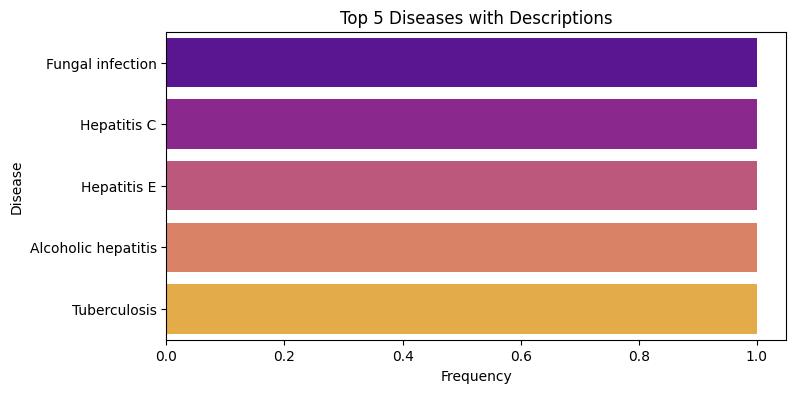

In [32]:
# Check for missing values
print("Missing values in Description dataset:")
print(description.isnull().sum())

# Analyze the frequency of diseases with descriptions
description_counts = description['Disease'].value_counts()  # Use the correct column name
print("Top 5 Diseases with Descriptions:")
print(description_counts.head(5))

# Plot the top 5 diseases with descriptions
top_5_descriptions = description_counts.head(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_5_descriptions.values, y=top_5_descriptions.index, palette="plasma")
plt.title('Top 5 Diseases with Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.show()

Missing values in Medications dataset:
Disease       0
Medication    0
dtype: int64
Top 5 Diseases with Medications:
Disease
Fungal infection       1
Hepatitis C            1
Hepatitis E            1
Alcoholic hepatitis    1
Tuberculosis           1
Name: count, dtype: int64


C:\Users\deves\AppData\Local\Temp\ipykernel_2280\1521311344.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_medications.values, y=top_5_medications.index, palette="cividis")


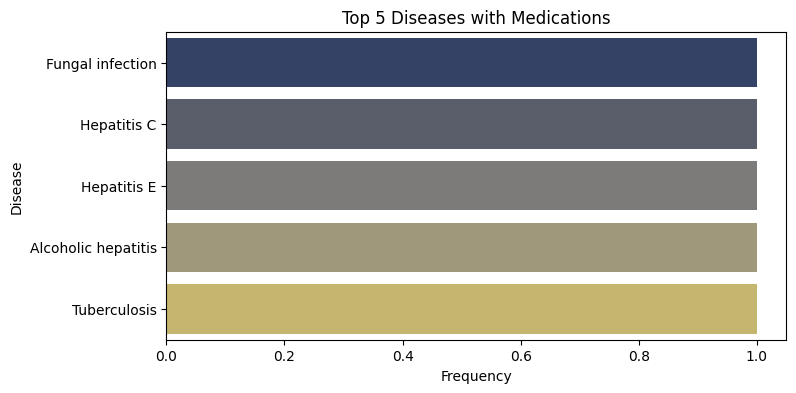

In [33]:
# Check for missing values
print("Missing values in Medications dataset:")
print(medications.isnull().sum())

# Analyze the frequency of diseases with medications
medication_counts = medications['Disease'].value_counts()  # Correct column name
print("Top 5 Diseases with Medications:")
print(medication_counts.head(5))

# Plot the top 5 diseases with medications
top_5_medications = medication_counts.head(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_5_medications.values, y=top_5_medications.index, palette="cividis")
plt.title('Top 5 Diseases with Medications')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.show()

Missing values in Diets dataset:
Disease    0
Diet       0
dtype: int64
Top 5 Diseases with Diets:
Disease
Fungal infection       1
Hepatitis C            1
Hepatitis E            1
Alcoholic hepatitis    1
Tuberculosis           1
Name: count, dtype: int64


C:\Users\deves\AppData\Local\Temp\ipykernel_2280\2085357001.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_diets.values, y=top_5_diets.index, palette="cubehelix")


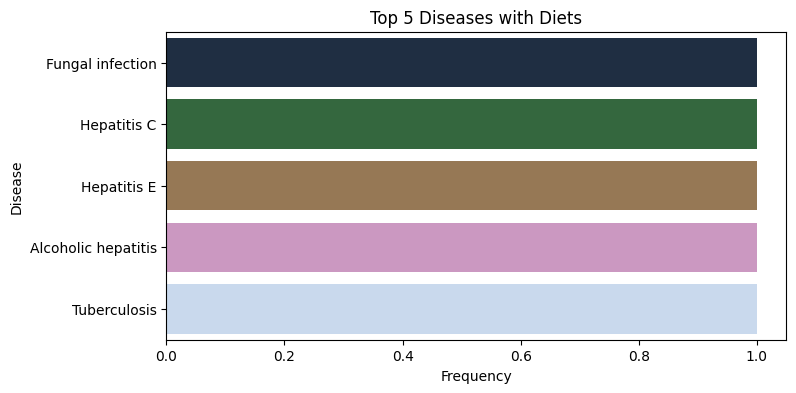

In [34]:
# Check for missing values
print("Missing values in Diets dataset:")
print(diets.isnull().sum())

# Analyze the frequency of diseases with diets
diet_counts = diets['Disease'].value_counts()  # Correct column name
print("Top 5 Diseases with Diets:")
print(diet_counts.head(5))

# Plot the top 5 diseases with diets
top_5_diets = diet_counts.head(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_5_diets.values, y=top_5_diets.index, palette="cubehelix")
plt.title('Top 5 Diseases with Diets')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.show()

Top 5 Diseases Across All Datasets:
vomiting      1914.0
fatigue       1842.0
high_fever     864.0
chills         798.0
skin_rash      786.0
Name: count, dtype: float64


C:\Users\deves\AppData\Local\Temp\ipykernel_2280\3897435115.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_combined.values, y=top_5_combined.index, palette="viridis")


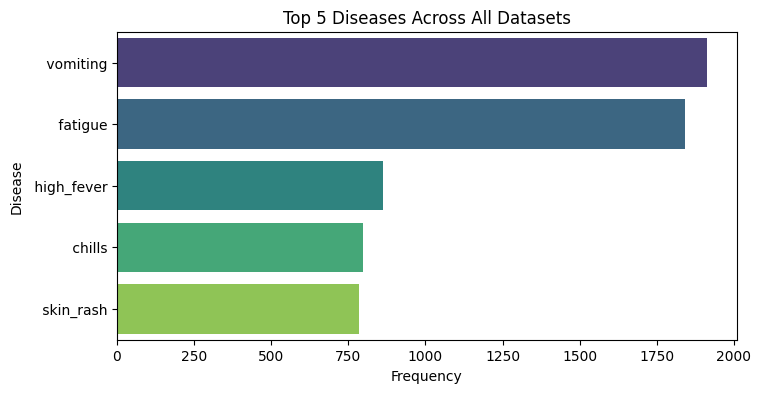

In [35]:
# Combine top diseases from all datasets
combined_counts = (
    symptom_counts.add(precaution_counts, fill_value=0)
    .add(workout_counts, fill_value=0)
    .add(description_counts, fill_value=0)
    .add(medication_counts, fill_value=0)
    .add(diet_counts, fill_value=0)
)

# Get the top 5 diseases across all datasets
top_5_combined = combined_counts.sort_values(ascending=False).head(5)
print("Top 5 Diseases Across All Datasets:")
print(top_5_combined)

# Plot the top 5 diseases across all datasets
plt.figure(figsize=(8, 4))
sns.barplot(x=top_5_combined.values, y=top_5_combined.index, palette="viridis")
plt.title('Top 5 Diseases Across All Datasets')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.show()

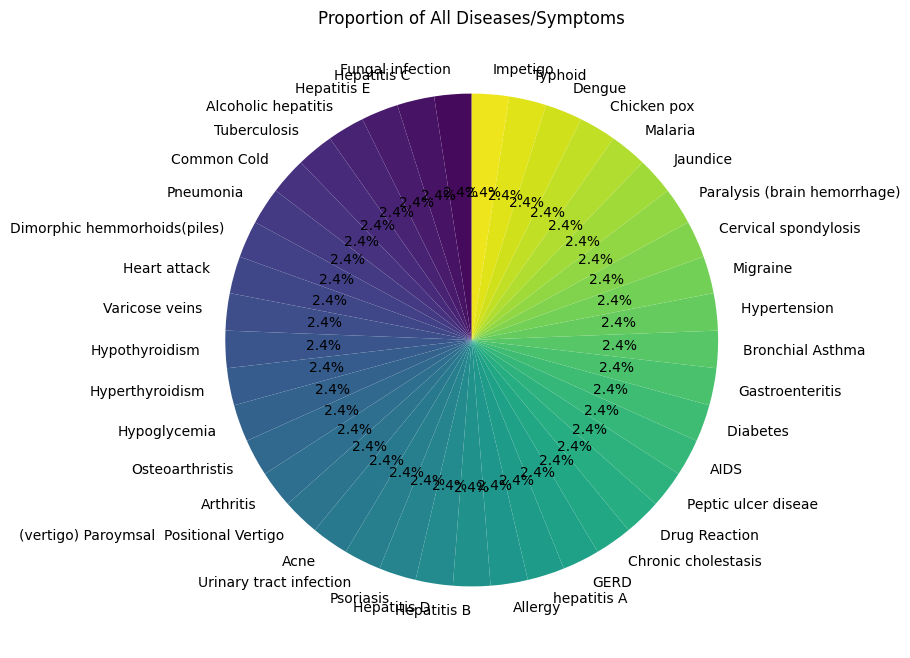

In [36]:
# Pie chart for all diseases/symptoms
all_symptoms = sym_des['Disease'].value_counts()  # Use the 'Disease' column for analysis

plt.figure(figsize=(8, 8))
all_symptoms.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(all_symptoms)))
plt.title('Proportion of All Diseases/Symptoms')
plt.ylabel('')  # Remove y-axis label for better visualization
plt.show()

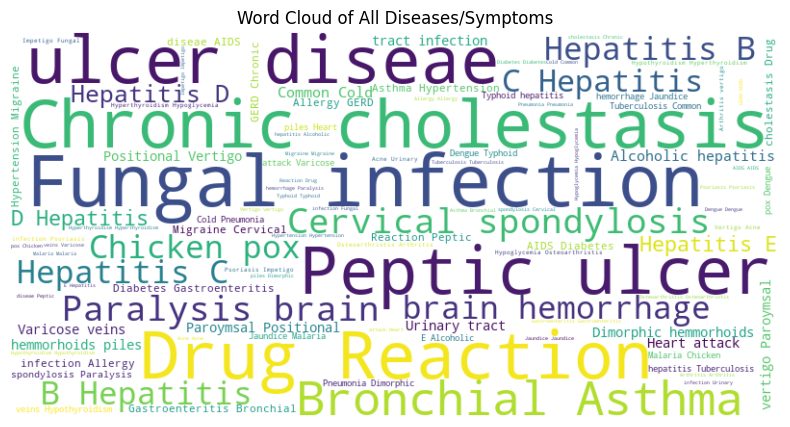

In [37]:
from wordcloud import WordCloud

# Generate a word cloud for all diseases/symptoms
all_symptom_text = ' '.join(sym_des['Disease'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_symptom_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Diseases/Symptoms')
plt.show()

C:\Users\deves\AppData\Local\Temp\ipykernel_2280\4026709276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Disease', data=sym_des, order=sym_des['Disease'].value_counts().index, palette="coolwarm")


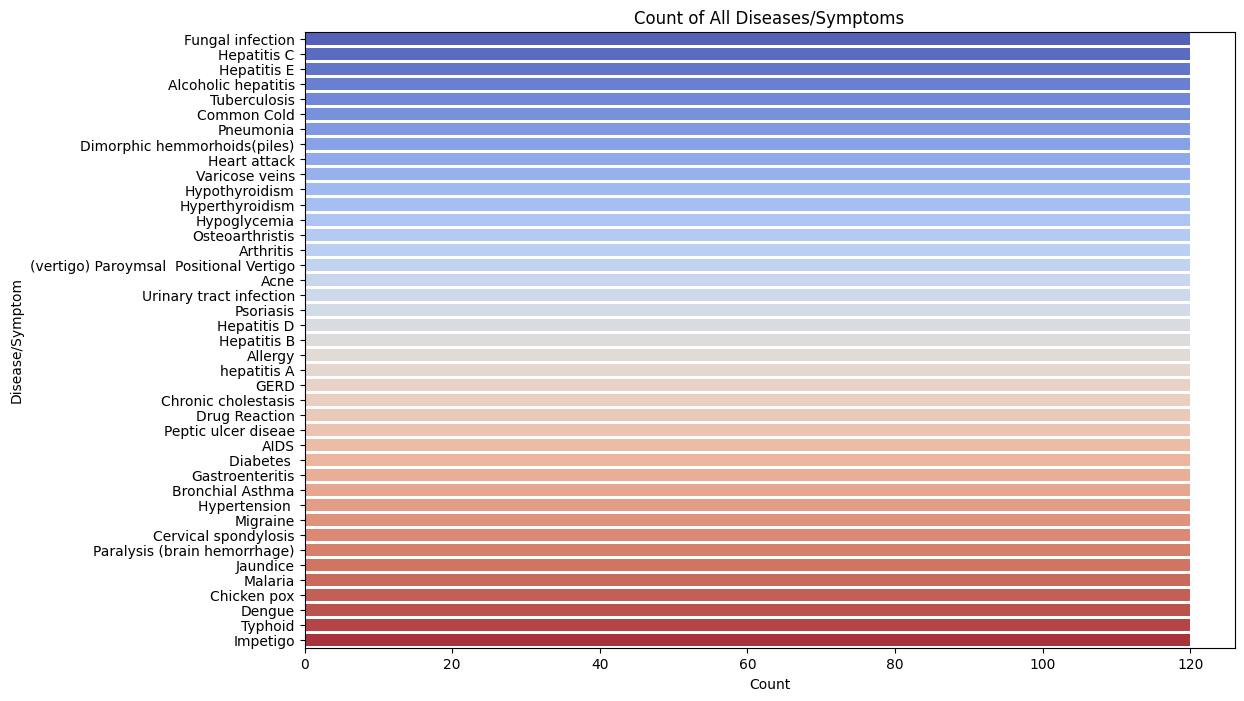

In [38]:
# Count plot for all diseases/symptoms
plt.figure(figsize=(12, 8))
sns.countplot(y='Disease', data=sym_des, order=sym_des['Disease'].value_counts().index, palette="coolwarm")
plt.title('Count of All Diseases/Symptoms')
plt.xlabel('Count')
plt.ylabel('Disease/Symptom')
plt.show()

C:\Users\deves\AppData\Local\Temp\ipykernel_2280\989324572.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Presence', y='prognosis', data=filtered_data, palette='muted')


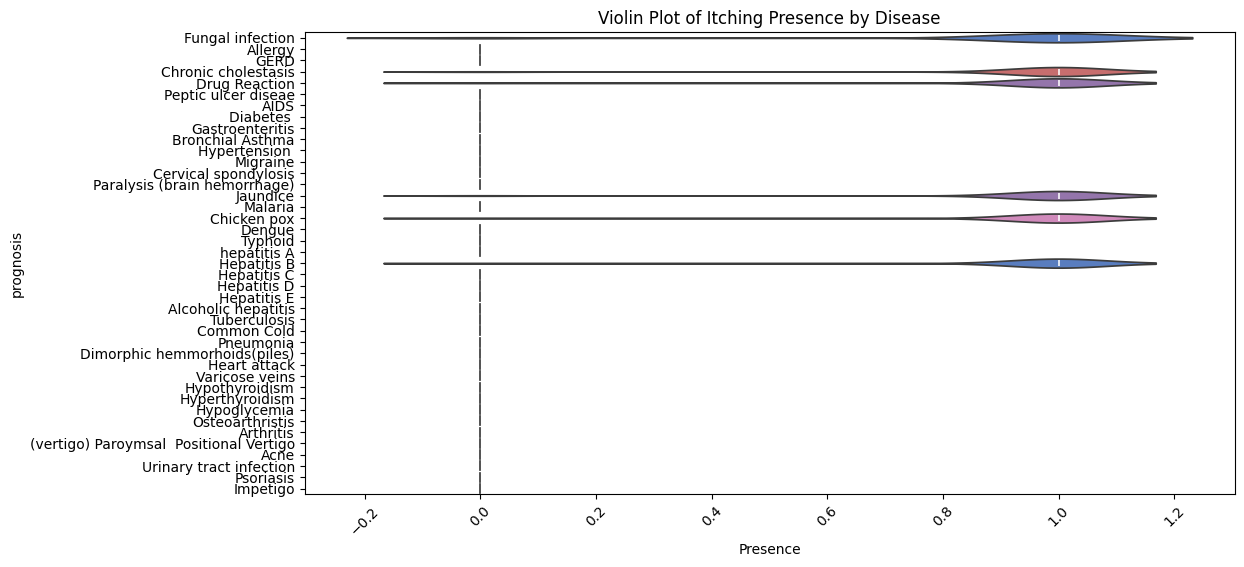

In [39]:
# Violin plot for numerical columns grouped by diseases
# Reshape the data to include symptoms as individual columns
symptom_data = dataset.melt(id_vars=['prognosis'], var_name='Symptom', value_name='Presence')

# Filter for a specific symptom (e.g., 'itching')
filtered_data = symptom_data[symptom_data['Symptom'] == 'itching']

plt.figure(figsize=(12, 6))
sns.violinplot(x='Presence', y='prognosis', data=filtered_data, palette='muted')
plt.title('Violin Plot of Itching Presence by Disease')
plt.xticks(rotation=45)
plt.show()

C:\Users\deves\AppData\Local\Temp\ipykernel_2280\2651141170.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


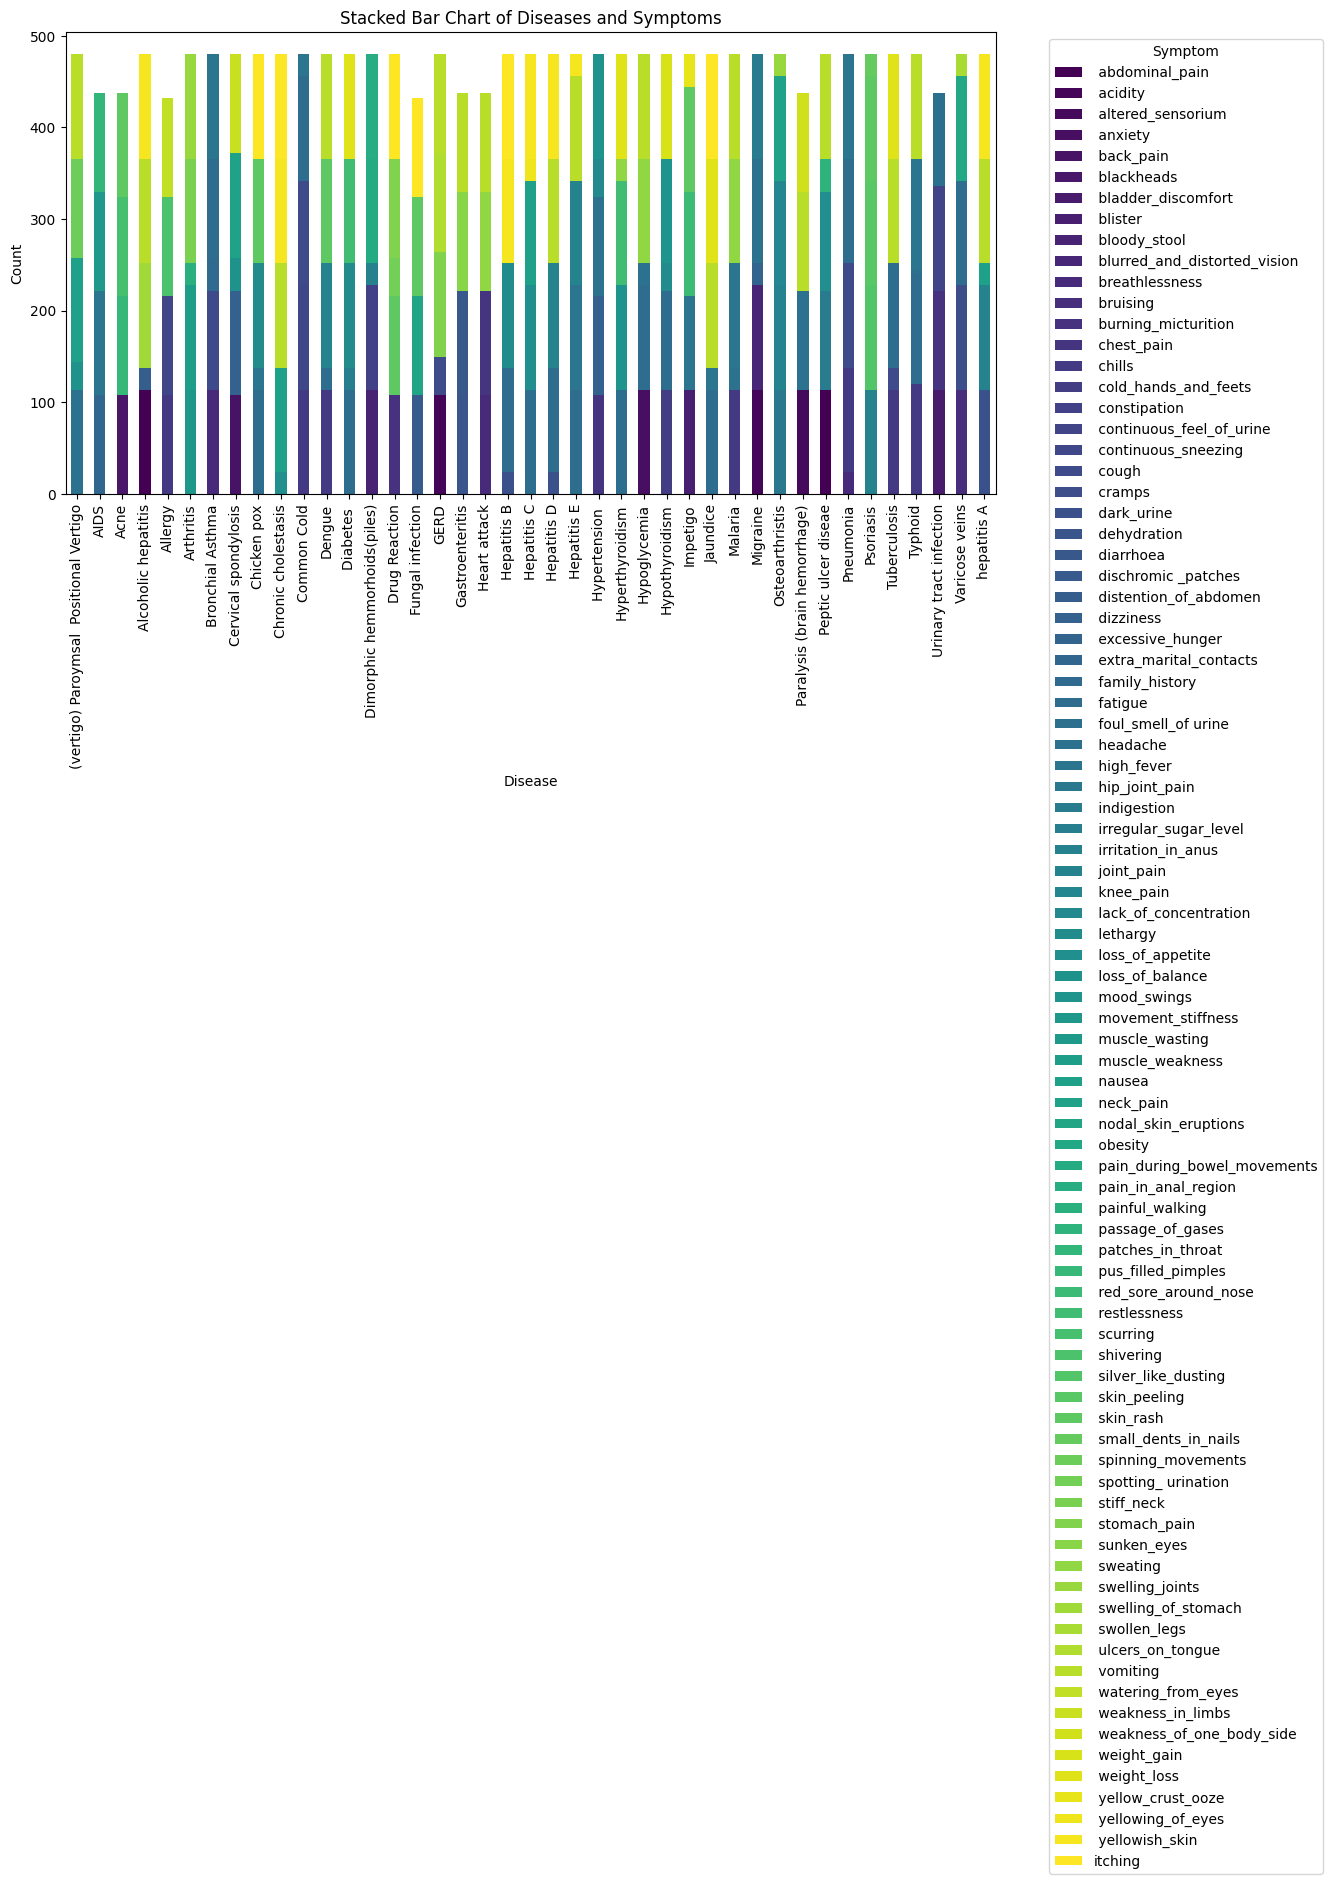

In [40]:
# Stacked bar chart for diseases and their symptoms
# Combine all symptom columns into a single column for analysis
symptom_data = sym_des.melt(id_vars=['Disease'], value_vars=['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4'], 
							var_name='Symptom_Type', value_name='Symptom').dropna()

# Count the occurrences of each symptom for each disease
symptom_counts = symptom_data.groupby(['Disease', 'Symptom']).size().unstack(fill_value=0)

# Plot the stacked bar chart
symptom_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar Chart of Diseases and Symptoms')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.legend(title='Symptom', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

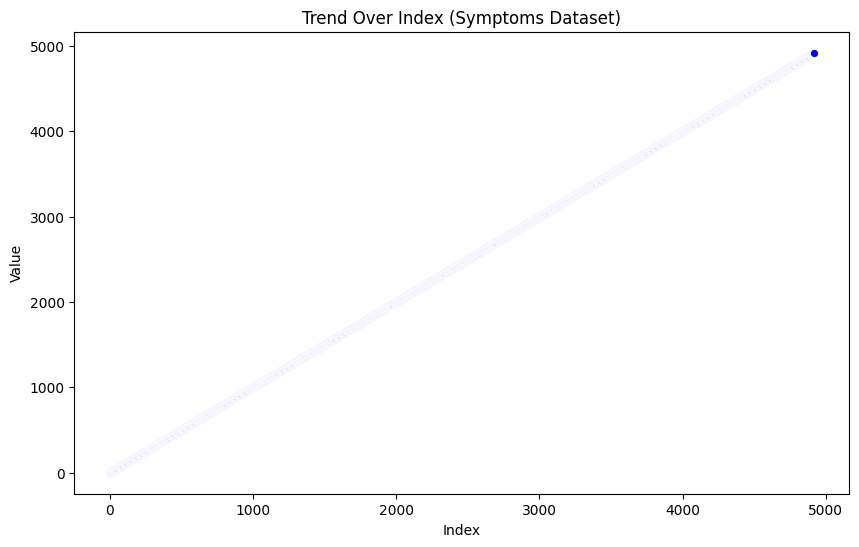

In [41]:
# Line plot for a numerical column over index (if no time column exists)
plt.figure(figsize=(10, 6))
sns.lineplot(x=sym_des.index, y='Unnamed: 0', data=sym_des, marker='o', color='blue')  # Replace 'Unnamed: 0' with an actual numerical column if needed
plt.title('Trend Over Index (Symptoms Dataset)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [42]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [43]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated)
symptoms = input("Enter your symptoms (e.g., itching, skin rash, nodal skin eruptions): ")
# Replace spaces with underscores and split the input into a list of symptoms
user_symptoms = [s.strip().replace(" ", "_") for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


C:\Users\deves\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [44]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


=================predicted disease============
Impetigo
=================description==================
Impetigo is a highly contagious skin infection causing red sores that can break open.
=================precautions==================
1 :  soak affected area in warm water
2 :  use antibiotics
3 :  remove scabs with wet compressed cloth
4 :  consult doctor
=================medications==================
5 :  ['Topical antibiotics', 'Oral antibiotics', 'Antiseptics', 'Ointments', 'Warm compresses']
=================workout==================
6 :  Maintain good hygiene
7 :  Stay hydrated
8 :  Consume nutrient-rich foods
9 :  Limit sugary foods and beverages
10 :  Include foods rich in vitamin C
11 :  Consult a healthcare professional
12 :  Follow medical recommendations
13 :  Avoid scratching
14 :  Take prescribed antibiotics
15 :  Practice wound care
=================diets==================
16 :  ['Impetigo Diet', 'Antibiotic treatment', 'Fruits and vegetables', 'Hydration', 'Protein-rich

C:\Users\deves\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [45]:
# let's use pycharm flask app
# but install this version in pycharm
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
# Bag-of-Words (BoW)

from sklearn.feature_extraction.text import CountVectorizer

# Example: Convert text data into numerical features
vectorizer = CountVectorizer()
text_data = precautions['Precaution_1'].dropna().tolist()  # Replace with the actual text column
X = vectorizer.fit_transform(text_data)

In [ ]:
# Word Embeddings

from gensim.models import Word2Vec

# Tokenize text data
tokenized_text = [sentence.split() for sentence in text_data]  # Replace `text_data` with your text column

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Get word embeddings
word_embeddings = {word: w2v_model.wv[word] for word in w2v_model.wv.index_to_key}

In [ ]:
# Sentiment Analysis Pipeline

from transformers import pipeline

# Load a sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")

# Example: Analyze text
result = classifier("I love using Hugging Face Transformers!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9971315860748291}]


In [ ]:
# Transformer Models (Hugging Face's DistilBERT):

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments
import pandas as pd

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
from sklearn.preprocessing import LabelEncoder

# Load or define the dataset
# Replace the following line with the actual path to your dataset or the logic to create it
dataset = pd.read_csv(r'C:\Users\deves\Downloads\Medicine-Recommendation-System-main\dataset\Training.csv')

# Encode string labels into integers
label_encoder = LabelEncoder()
y_train = dataset['prognosis']
label_encoder.fit(y_train)

# Set num_labels to the number of unique classes in the dataset
num_labels = len(label_encoder.classes_)
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_labels)

# Redefine X_train and X_test
X_train = dataset.drop('prognosis', axis=1)
y_train = dataset['prognosis']

# Ensure X_test and y_test are defined
X_test = dataset.drop('prognosis', axis=1)  # Replace with the correct logic if needed
y_test = dataset['prognosis']  # Define y_test as the labels for X_test

# Convert X_train and X_test to a list of strings
X_train_text = X_train.applymap(str).apply(lambda x: ' '.join(x), axis=1).tolist()
X_test_text = X_test.applymap(str).apply(lambda x: ' '.join(x), axis=1).tolist()

# Tokenize dataset
train_encodings = tokenizer(X_train_text, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test_text, truncation=True, padding=True, max_length=128)

from sklearn.preprocessing import LabelEncoder

# Encode string labels into integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Prepare dataset for training
import torch
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

train_dataset = Dataset(train_encodings, y_train_encoded)
test_dataset = Dataset(test_encodings, y_test_encoded)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\deves\AppData\Local\Temp\ipykernel_2280\3262528918.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train_text = X_train.applymap(str).apply(lambda x: ' '.join(x), axis=1).tolist()
C:\Users\deves\AppData\Local\Temp\ipykernel_2280\3262528918.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test_text = X_test.applymap(str).apply(lambda x: ' '.join(x), axis=1).tolist()
C:\Users\deves\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4

Epoch,Training Loss,Validation Loss


In [ ]:
from sklearn.metrics import classification_report

# Generate predictions
predictions = model.predict(X_test)

# Print classification report
print(classification_report(y_test, predictions))